In [7]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns 

In [10]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=300)
sc.logging.print_versions()

scanpy==1.4.6 anndata==0.7.6 umap==0.4.6 numpy==1.19.5 scipy==1.5.0 pandas==1.2.1 scikit-learn==0.22 statsmodels==0.12.2 python-igraph==0.9.9 louvain==0.7.0


In [210]:
results_file = '/SGRNJ06/randd/USER/cjj/scanpy/data/write/pbmc3k.h5ad'  # the file that will store the analysis results

In [214]:
adata = sc.read_10x_mtx(
    '/SGRNJ06/randd/USER/cjj/scanpy/data/filtered_gene_bc_matrices/hg19',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)                              # write a cache file for faster subsequent reading

... reading from cache file cache/SGRNJ06-randd-USER-cjj-scanpy-data-filtered_gene_bc_matrices-hg19-matrix.h5ad


In [215]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [216]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [217]:
adata.var

,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616


In [218]:
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTGAGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGCATGAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
sc.pl.highest_expr_genes(adata, n_top=20)

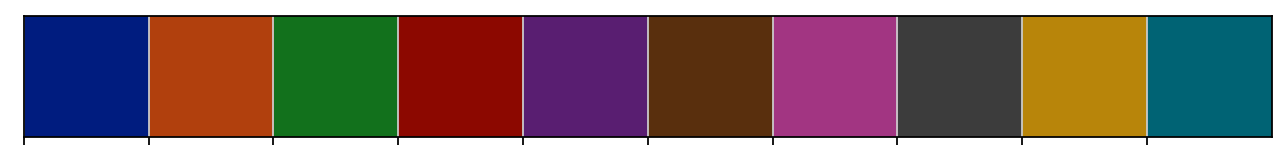

In [221]:
current_palette = sns.color_palette("dark")
sns.palplot(current_palette)

normalizing counts per cell
    finished (0:00:00)


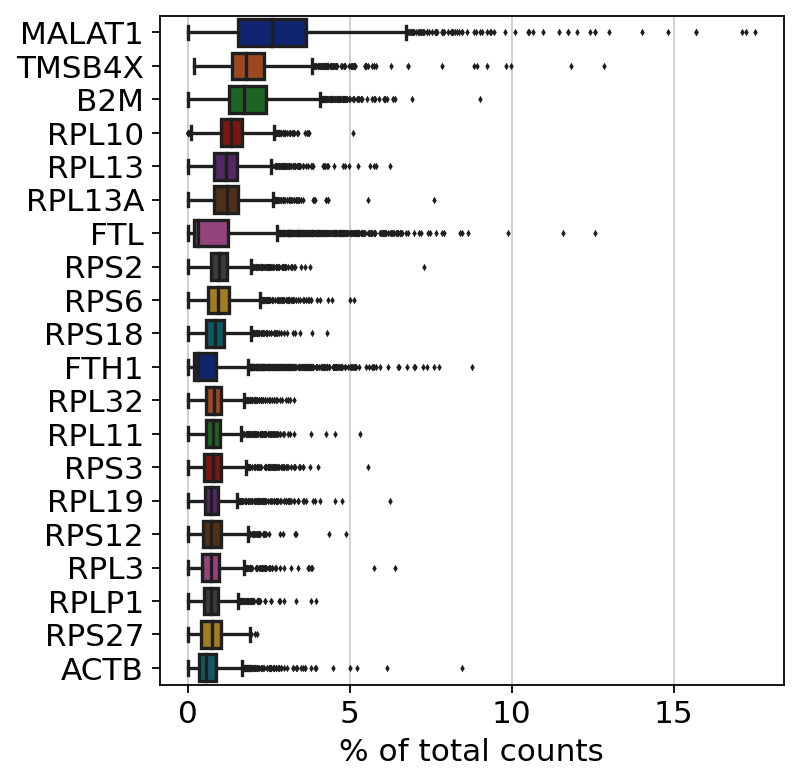

In [222]:
 sc.pl.highest_expr_genes(adata, n_top=20,palette="dark" )

In [223]:
# cell QC
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=0)
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

/SGRNJ01/Public/Software/anaconda3/lib/python3.7/site-packages/anndata-0.7.4-py3.7.egg/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Personal/chenjunjie/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Personal/chenjunjie/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


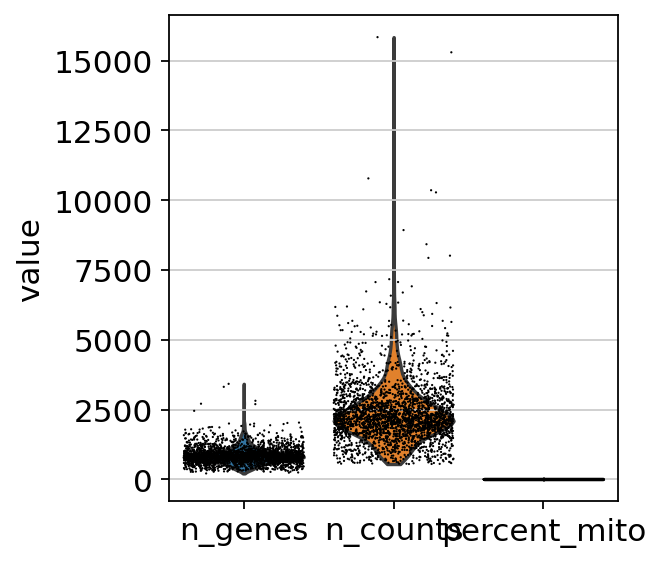

In [231]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4,)

/SGRNJ01/Public/Software/anaconda3/lib/python3.7/site-packages/anndata-0.7.4-py3.7.egg/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


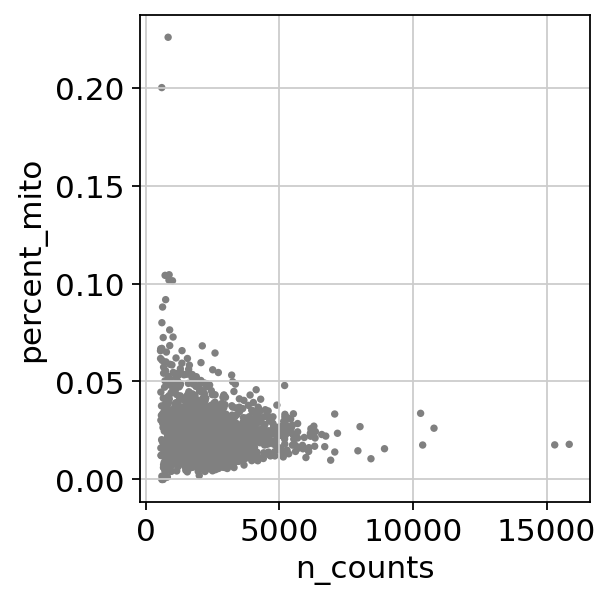

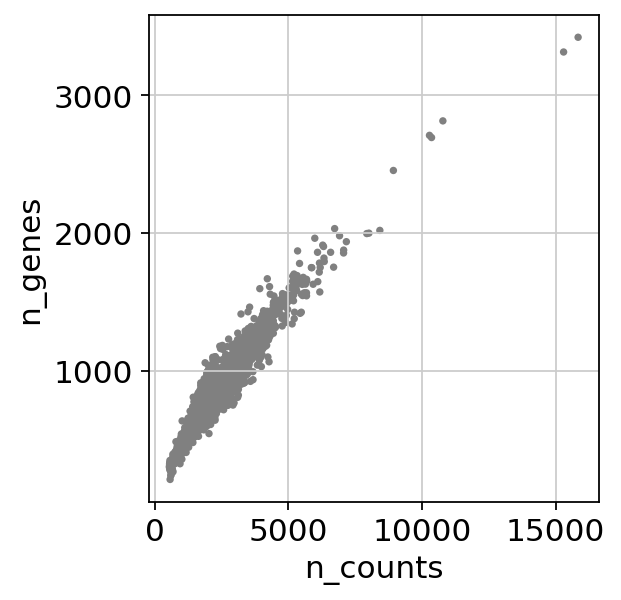

In [232]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [233]:
adata = adata[adata.obs.n_genes < 2500, :]
adata = adata[adata.obs.percent_mito < 0.1, :]

/SGRNJ01/Public/Software/anaconda3/lib/python3.7/site-packages/anndata-0.7.4-py3.7.egg/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/SGRNJ01/Public/Software/anaconda3/lib/python3.7/site-packages/anndata-0.7.4-py3.7.egg/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [234]:
adata.obs

,n_genes,percent_mito,n_counts
AAACATACAACCAC-1,781,0.030153,2421.0
AAACATTGAGCTAC-1,1352,0.037936,4903.0
AAACATTGATCAGC-1,1131,0.008892,3149.0
AAACCGTGCTTCCG-1,960,0.017431,2639.0
AAACCGTGTATGCG-1,522,0.012232,981.0
...,...,...,...
TTTCGAACTCTCAT-1,1155,0.021092,3461.0
TTTCTACTGAGGCA-1,1227,0.009283,3447.0
TTTCTACTTCCTCG-1,622,0.021971,1684.0
TTTGCATGAGAGGC-1,454,0.020508,1024.0


In [235]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

normalizing counts per cell
    finished (0:00:00)


/SGRNJ01/Public/Software/anaconda3/lib/python3.7/site-packages/scanpy-1.5.1-py3.7.egg/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


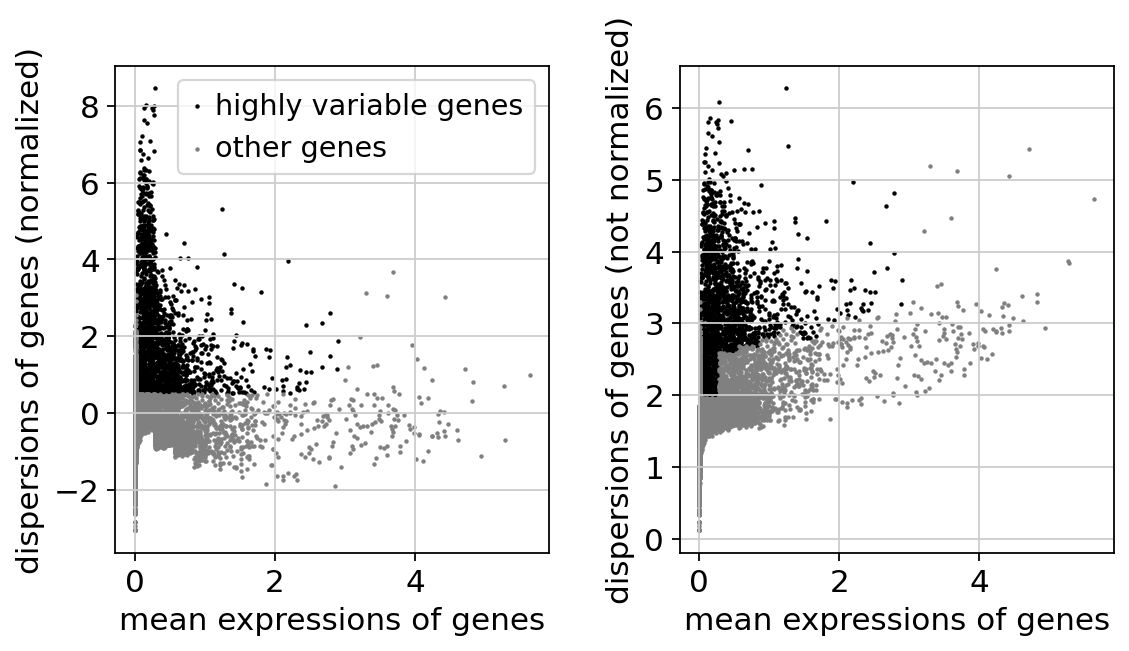

/SGRNJ01/Public/Software/anaconda3/lib/python3.7/site-packages/anndata-0.7.4-py3.7.egg/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [236]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
adata = adata[:, adata.var.highly_variable]


In [237]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use


/SGRNJ01/Public/Software/anaconda3/lib/python3.7/site-packages/anndata-0.7.4-py3.7.egg/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


    finished (0:00:12)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:18)


/SGRNJ01/Public/Software/anaconda3/lib/python3.7/site-packages/anndata-0.7.4-py3.7.egg/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


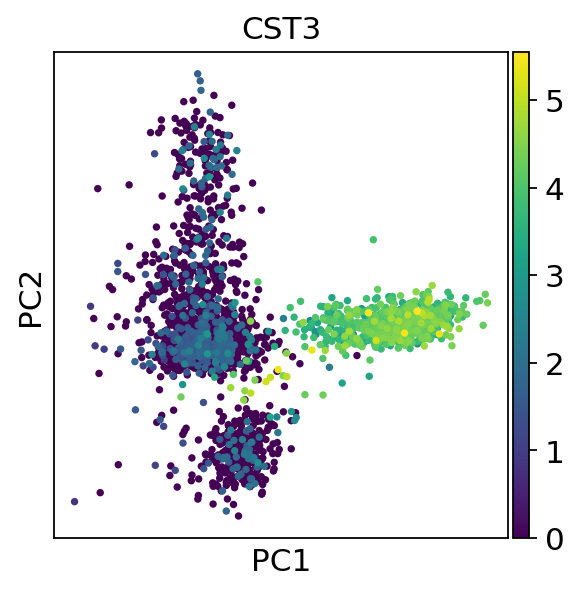

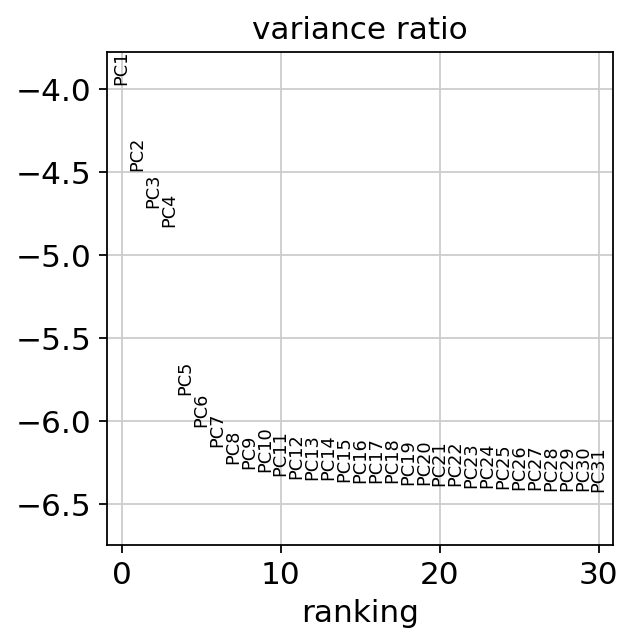

In [238]:
sc.pl.pca(adata, color='CST3')
sc.pl.pca_variance_ratio(adata, log=True)

In [241]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [242]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [243]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


/SGRNJ01/Public/Software/anaconda3/lib/python3.7/site-packages/anndata-0.7.4-py3.7.egg/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


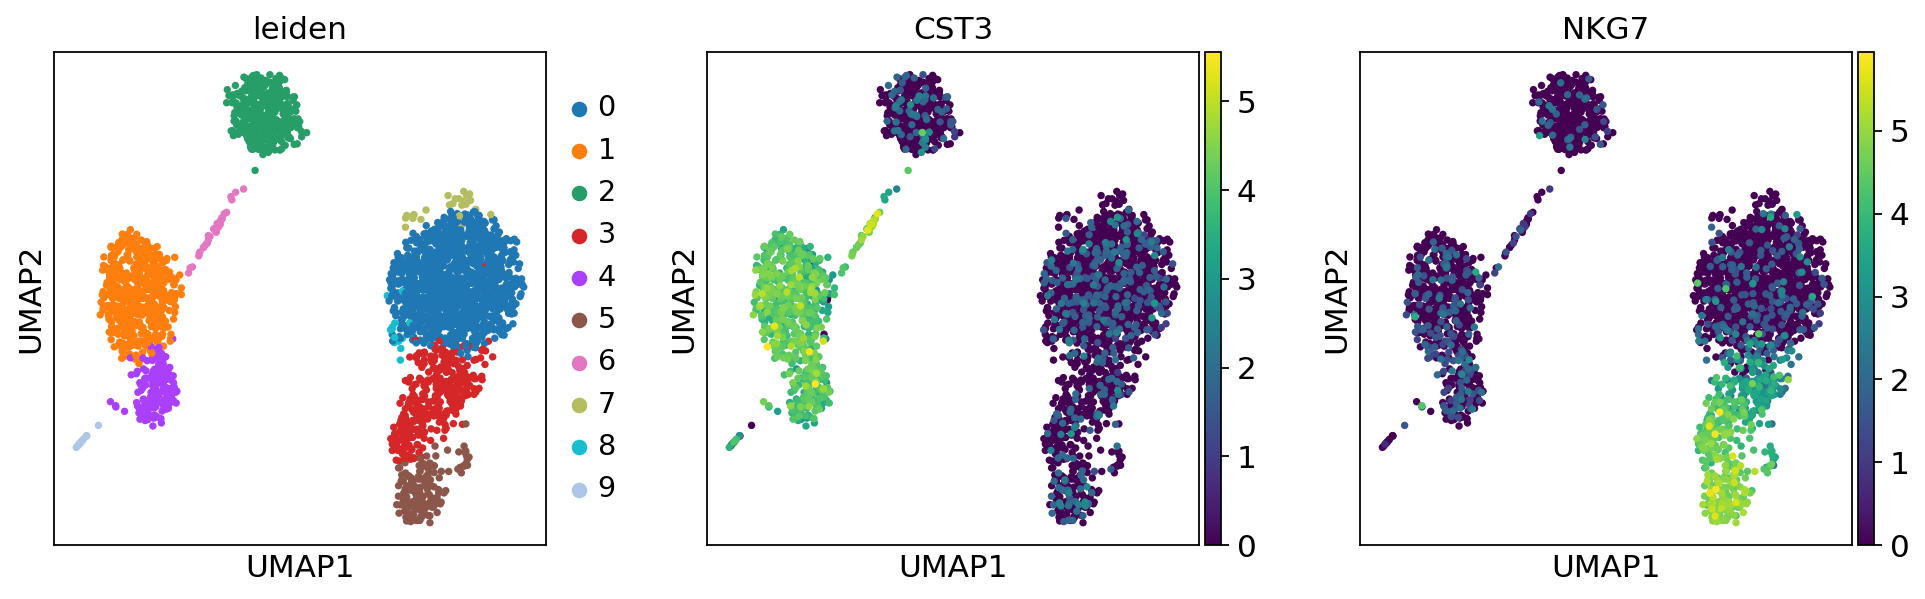

In [244]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

In [245]:
 sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


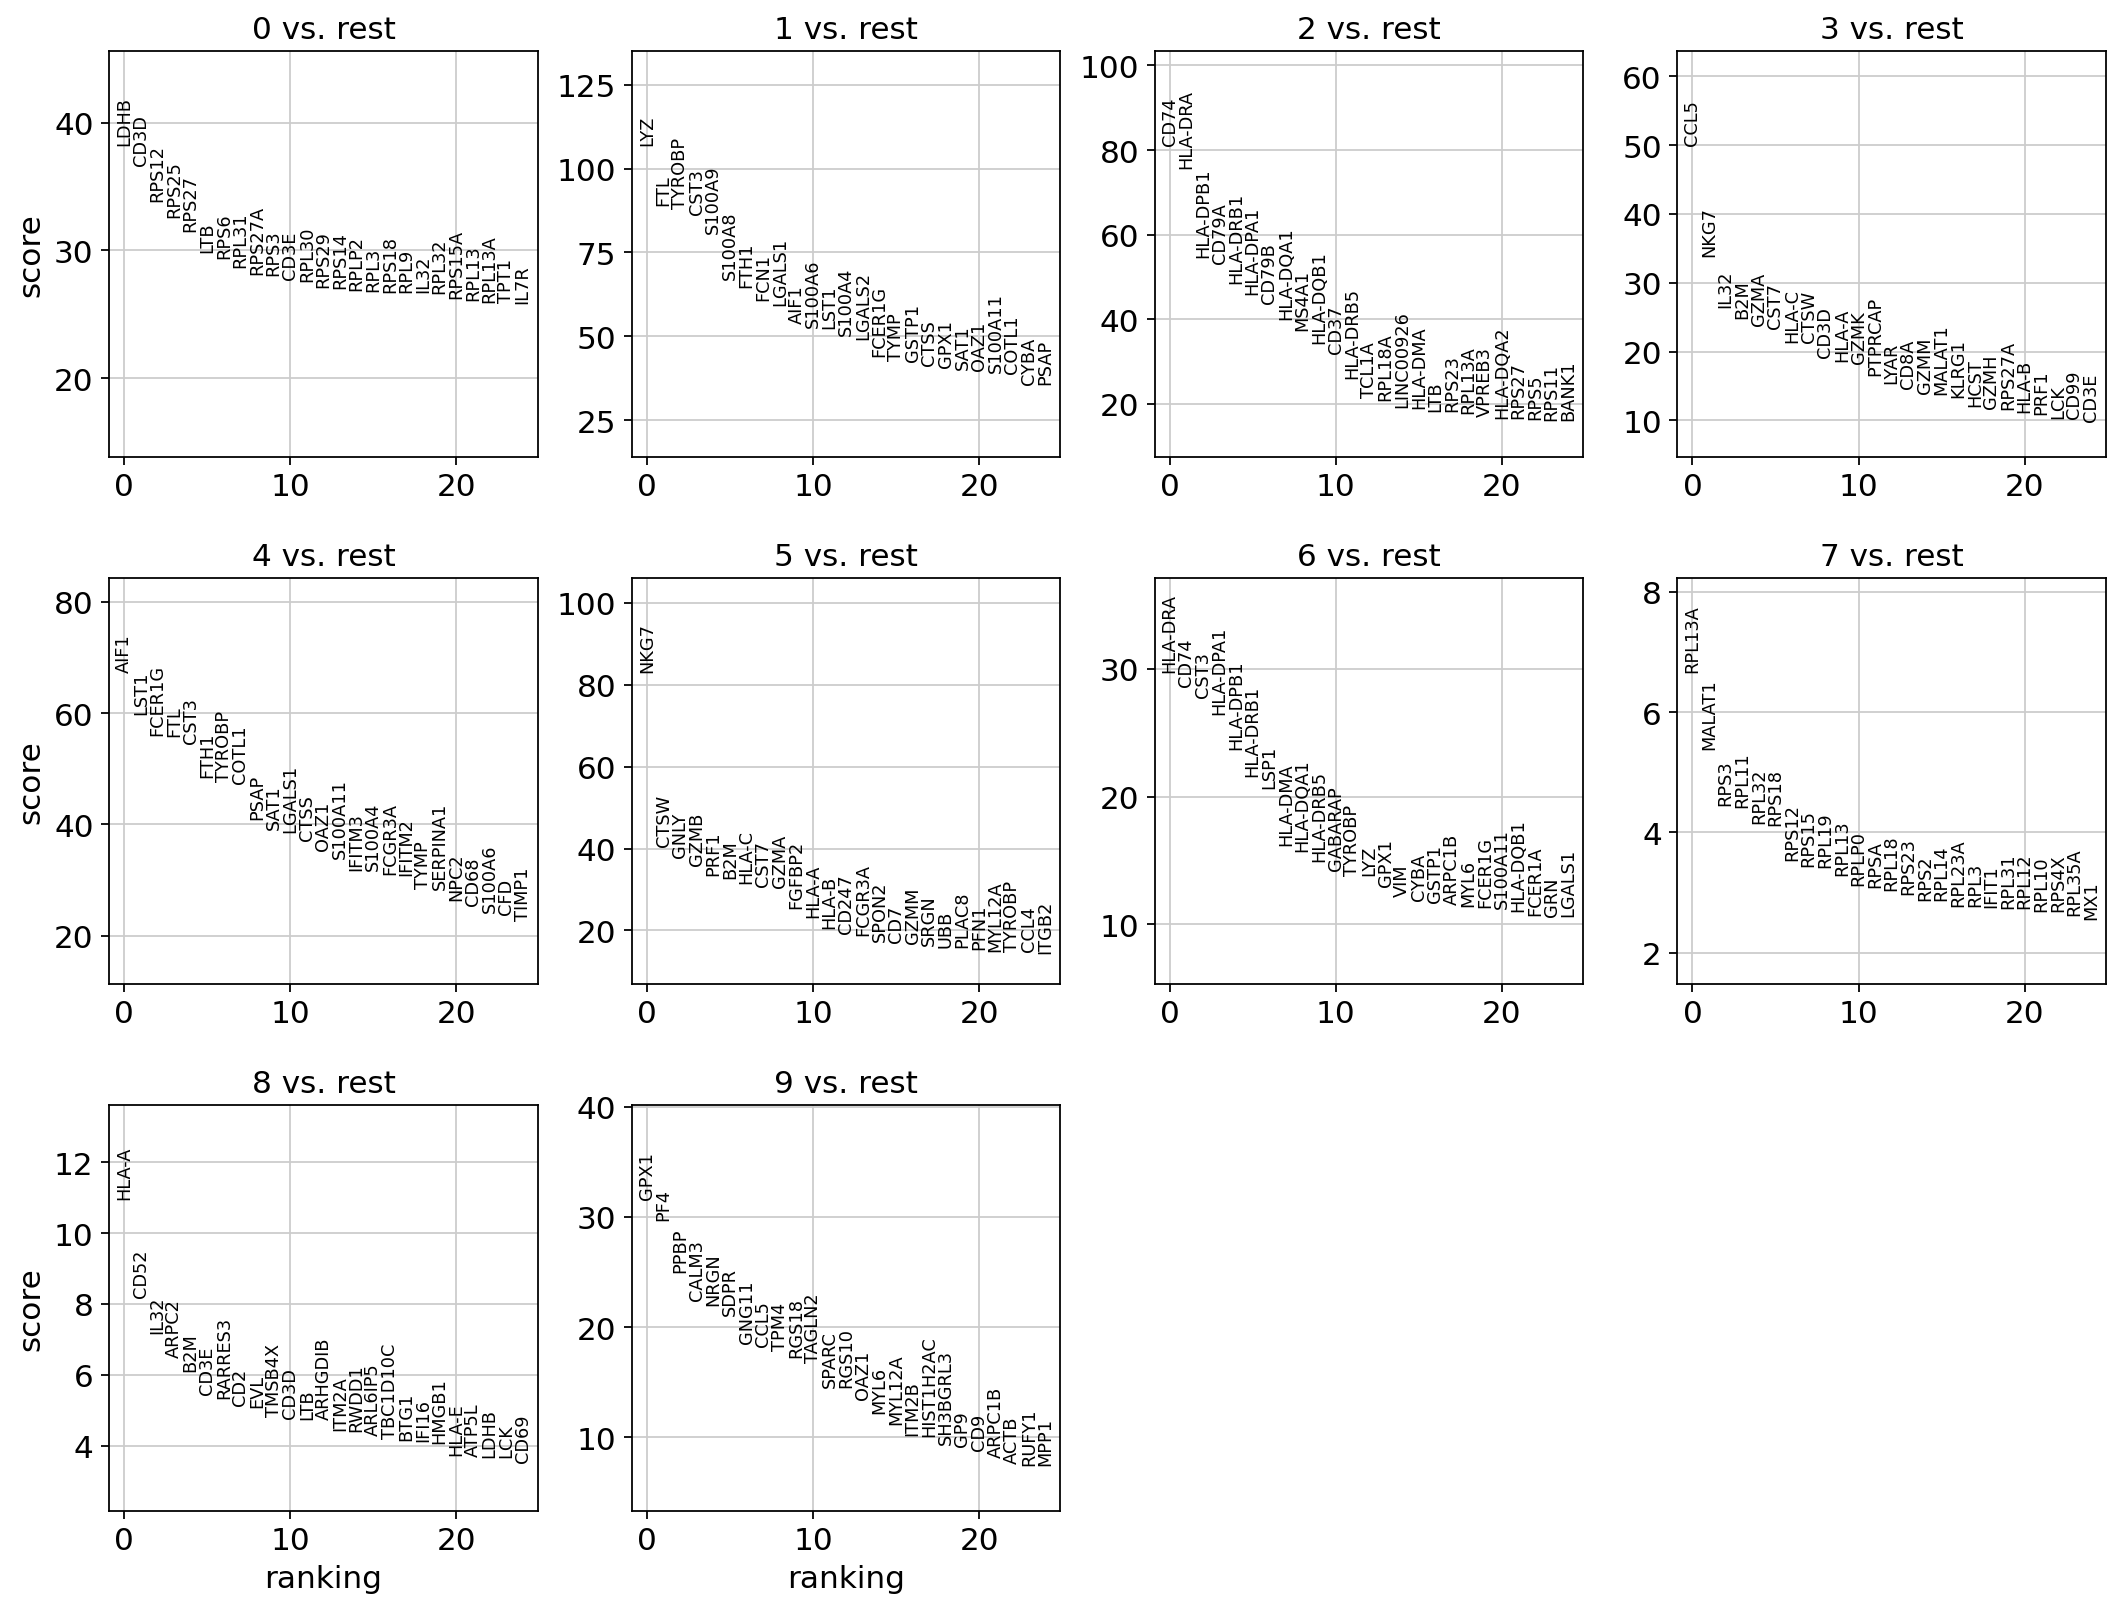

In [246]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [250]:
sc.get.rank_genes_groups_df(adata, group="0")

,scores,names,logfoldchanges,pvals,pvals_adj
0,38.261688,LDHB,2.611384,1.549514e-255,1.690933e-251
1,36.682865,CD3D,3.031405,6.764781e-238,3.691090e-234
2,33.887325,RPS12,1.027662,4.607361e-206,1.508358e-202
3,32.643776,RPS25,1.159288,1.043124e-193,2.845817e-190
4,31.545914,RPS27,0.974337,1.736242e-183,4.372393e-180
...,...,...,...,...,...
95,14.203061,CD40LG,3.285233,7.830023e-43,1.170499e-40
96,14.166338,ZFP36L2,1.152749,7.299629e-44,1.121950e-41
97,14.034387,TMEM123,1.363699,5.892604e-43,8.849177e-41
98,13.937477,RPL37,0.639980,1.114982e-42,1.651687e-40


In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')

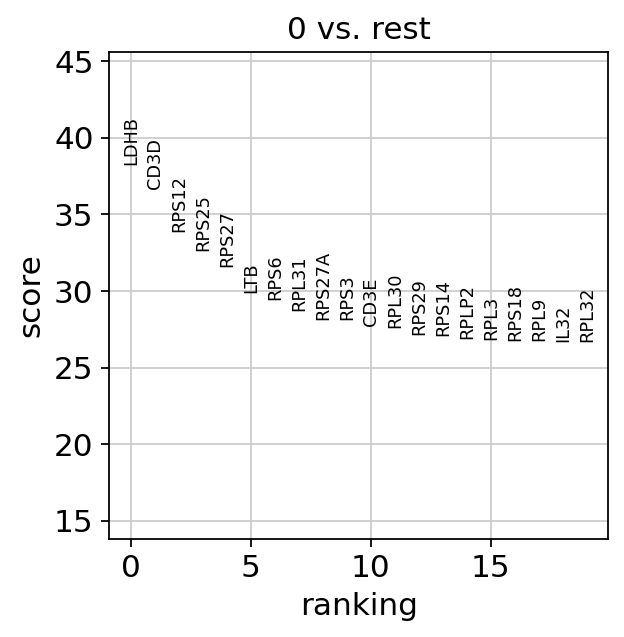

In [248]:
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

In [255]:
set(adata.obs.leiden.tolist())

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [8]:
rds = sc.read_h5ad("/SGRNJ06/randd/USER/cjj/celedev/rna/20221020/GC_0_ZL/06.analysis/GC_0_ZL.h5ad")

In [17]:
rds.obs

,n_genes_by_counts,total_counts,total_counts_mito,pct_counts_mito,cluster
AAACATCGAAACATCGCCTCCTGA,3754,12809.0,831.0,6.487626,5
AAACATCGAAACATCGGCCAAGAC,3184,10130.0,964.0,9.516289,9
AAACATCGAAACATCGTGAAGAGA,3932,16205.0,1936.0,11.946930,2
AAACATCGAACAACCAAGAGTCAA,4583,18669.0,1270.0,6.802722,5
AAACATCGAACCGAGAAACGCTTA,240,1521.0,1251.0,82.248520,14
...,...,...,...,...,...
TTCACGCATGGTGGTAAACGTGAT,2854,8284.0,638.0,7.701593,15
TTCACGCATGGTGGTAATCCTGTA,4828,18246.0,1807.0,9.903541,2
TTCACGCATGGTGGTACCATCCTC,961,1654.0,365.0,22.067715,1
TTCACGCATGGTGGTACGAACTTA,2219,5112.0,1678.0,32.824726,1


In [ ]:
sc.pl.umap(rds,color="cluster")

0     1897
1     1884
2     1839
3     1604
4     1515
5     1392
6     1359
7     1247
8     1015
9      998
10     814
11     785
12     692
13     492
14     458
15     360
16     324
Name: cluster, dtype: int64

In [34]:
cells = rds.obs[rds.obs["cluster"]== "1"].index

In [38]:
cells = set(cells)

In [ ]:
cells

In [40]:
df = rds.obs

In [42]:
df["Class"] = "NA"

In [44]:
df.loc[df.index.isin(cells), "Class"] = "T/BCR"

In [46]:
rds.obs = df

In [63]:
sc.is_color_like()

AttributeError: module 'scanpy' has no attribute 'is_color_like'

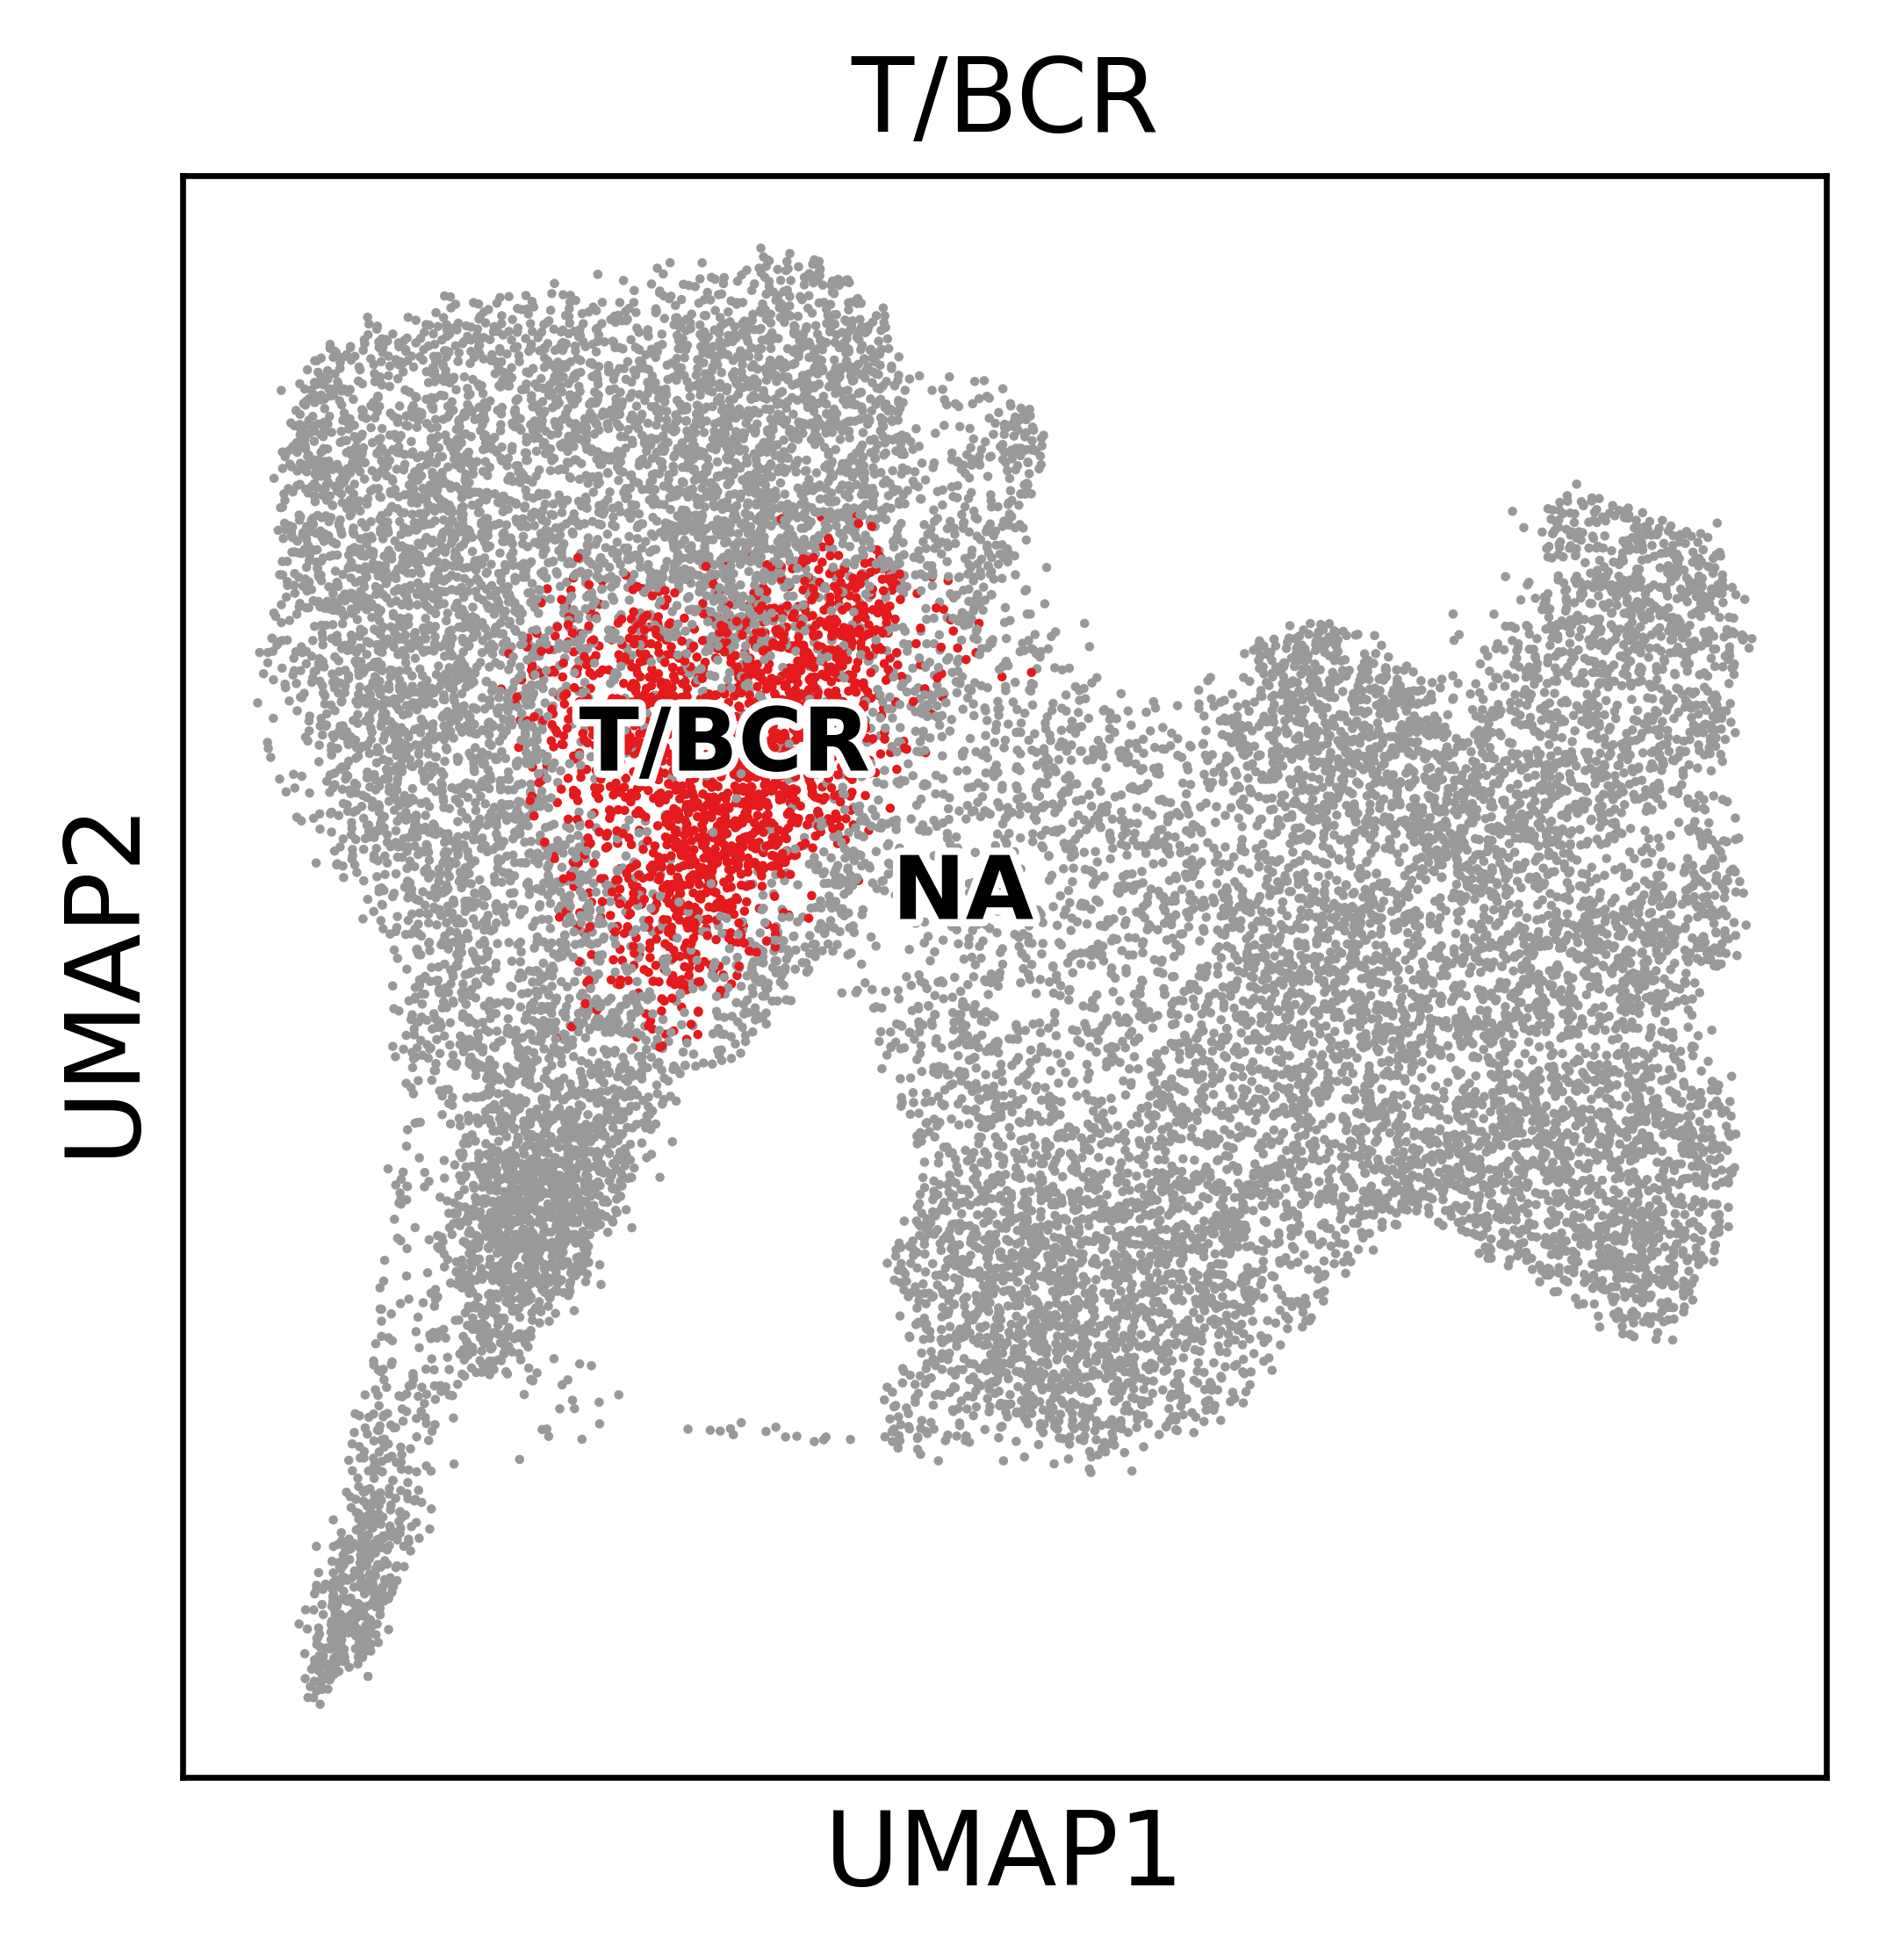

In [79]:
# ,add_outline=True
sc.pl.umap(rds,color="Class",legend_loc="on data", legend_fontsize=12, legend_fontoutline=2, title="T/BCR", palette="Set1_r")

In [ ]:
        if line.startswith("| [["):
            if index % 2 == 0:
                name = line
            else:
                region = line
            index += 1
            try:
                coffee_dict[name] = region
            except:
                pass

In [124]:
coffee_dict = dict()
index = 0
with open("/SGRNJ06/randd/USER/cjj/temp_dir/wiki/coffee_list.txt") as f:
    res = (list(f.readlines()))
        

In [127]:
res = [i.strip('\n') for i in res]

In [132]:
indexs = []
count = 0
for i in res:
    count += 1
    if i == '|-':
        indexs.append(count)

In [146]:
brand_list = []
country_list = []
for i in indexs:
    brand_list.append(res[i].strip('|[[ ').strip(']] '))
    country_list.append(res[i+1].strip('|[[ ').strip(']] '))

In [150]:
res_dict = dict(zip(brand_list, country_list))

In [152]:
res_dict

{'%Arabica': 'Hong Kong',
 '85C Bakery Cafe': 'Taiwan',
 'Aida (café)|Aida': 'Austria',
 'AMT Coffee': 'United Kingdom',
 'Angel-in-us': 'South Korea',
 'Arcaffe': 'Israel',
 'Aroma Café': 'United Kingdom',
 'Aroma Espresso Bar': 'Israel',
 'Au Bon Pain': 'United States',
 "Baker's Dozen Donuts": 'Canada',
 'Barista (company)|Barista': 'India',
 "Bewley's": 'Republic of Ireland|Ireland',
 'Biggby Coffee': 'United States',
 'Blenz Coffee': 'Canada',
 'Blue Bottle Coffee': 'United States',
 "Bo's Coffee": 'Philippines',
 'Boston Tea Party (café chain)|Boston Tea Party': 'United Kingdom',
 'Bourbon Coffee': 'Rwanda',
 'Bridgehead Coffee': 'Canada',
 'Café Amazon': 'Thailand',
 'Cafe Barbera': 'Italy',
 'Café Café': 'Israel',
 'Café Coffee Day': 'India',
 'Café Hillel': 'Israel',
 'Caffe Bene': 'South Korea',
 'Caffè-Pasticceria Cova': 'Italy',
 'Caffè Nero': 'United Kingdom',
 'Caffè Pascucci': 'Italy',
 'Caffè Ritazza': 'United Kingdom',
 'Caffe Trieste': 'United States',
 'Caffé Vita Co